In [1]:
#install sympy 

!pip install sympy

In [29]:
!pip install pandas
!pip install seaborn

In [2]:
#import libraries 
# #Description:
#This program classifies a person as having a cardiovascular disease (1) or not (0)
#So the target class "cardio" equals 1, when the patient has cardiovascular disease, and it's 0, when the patient is healthy.
import numpy as np 
import pandas as pd 
import seaborn as sns

Description:
This program classifies a person as having a cardiovascular disease (1) or not (0)
So the target class "cardio" equals 1, when the patient has cardiovascular disease, and it's 0, when the patient is healthy.

Import Libraries
 numpy = to work with arays
 pandas = to work with csv files and data frames
  seaborn = to visualize the data

In [3]:
#Storing the data into the df variable and printing the data
df = pd.read_csv('cardio.csv')
df.head(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,8,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,9,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,13,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,14,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [4]:
#Getting the total number of rows & columns(shape)
df.shape

(70000, 13)

In [7]:
#Counting the empty (NaN, NAN, na) values in each column
df.isna().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [8]:
#Get a count of the number of '0 & '1 cells
df['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [9]:

#Another check for any null / missing values
df.isnull().values.any()

False

In [10]:
#Look at the data types 
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [11]:
# Getting some statistics on the data loke prcentile, mean, standard deviation etc.
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='cardio', ylabel='count'>

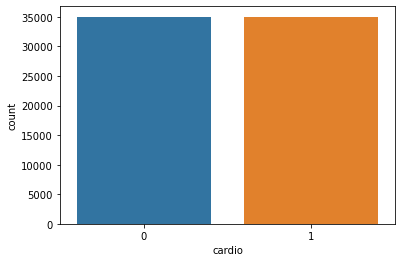

In [12]:
#Visualizing the number of individuals with a cardiovascular disease 
# and the number of individuals without a cardiovascular disease.
sns.countplot(df['cardio'])

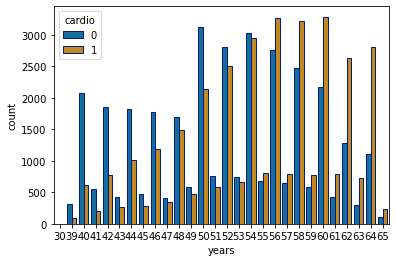

In [13]:
# Let's look at  the number of people with a Cardio Vascular Disease that exceed
#the number of people without a Cardio Vascular Disease?
#Create a years column
df['years'] = ( df['age'] / 365).round(0)   #Get the years by dividing the age in days by 365
df["years"] = pd.to_numeric(df["years"],downcast='integer') # Convert years to an integer
#Visualize the data
#colorblind palette for colorblindness
sns.countplot(x='years', hue='cardio', data = df, palette="colorblind", edgecolor=sns.color_palette("dark", n_colors = 1));

In [14]:
#Get the correlation of the columns
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,years
id,1.000000,0.003457,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,0.002467,-0.003699,0.001210,0.003755,0.003799,0.003050
age,0.003457,1.000000,-0.022811,-0.081515,0.053684,0.020764,0.017647,0.154424,0.098703,-0.047633,-0.029723,-0.009927,0.238159,0.999090
gender,0.003502,-0.022811,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,-0.003038,-0.081515,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,-0.001830,0.053684,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.003356,0.020764,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,-0.002529,0.017647,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,0.006106,0.154424,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,0.002467,0.098703,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,-0.003699,-0.047633,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884


<AxesSubplot:>

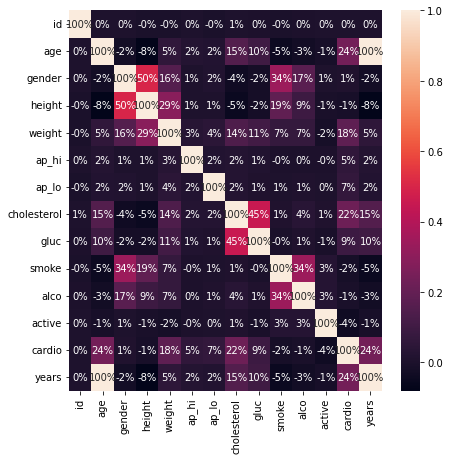

In [41]:
#Visualize the correlation
import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))  #7in by 7in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [15]:
# Remove or drop the years column
df = df.drop('years', axis=1)
#Remove or drop the id column
df = df.drop('id', axis=1)

In [16]:
#Split the data into feature data and target data

X = df.iloc[:, 2:12].values 
Y = df.iloc[:, 1].values 

In [17]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=41faabdf9558ce1bae9af136d620c5dd8437d09f12647ba10ad6f59ecddc03ea
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


In [18]:
#Split the data again, into 75% training data set and 25% testing data set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.25, random_state = 1)

In [19]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [20]:
def models(X_train,Y_train):
  
    #Using Logistic Regression 
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state = 0)
    log.fit(X_train, Y_train)

    #Using KNeighborsClassifier 
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    knn.fit(X_train, Y_train)


    #Using GaussianNB 
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)

    #Using DecisionTreeClassifier 
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    tree.fit(X_train, Y_train)

    #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    forest.fit(X_train, Y_train)

    #print model accuracy on the training data.
    print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
    print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
    print('[2]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
    print('[3]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
    print('[4]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))

    return log, knn, gauss, tree, forest

In [21]:
model = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.7949333333333334
[1]K Nearest Neighbor Training Accuracy: 0.8254666666666667
[2]Gaussian Naive Bayes Training Accuracy: 0.7337333333333333
[3]Decision Tree Classifier Training Accuracy: 0.9274857142857142
[4]Random Forest Classifier Training Accuracy: 0.9167047619047619


 Test the models accuracy on the test data set by creating a confusion matrix and then using the confusion matrix to compute the accuracy score. Print the confusion matrix and the accuracy to the screen.

In [22]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))

    TN = cm[0][0]
    TP = cm[1][1]
    FN = cm[1][0]
    FP = cm[0][1]

    print(cm)
    print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
    print()# Print a new line

[[10427  1005]
 [ 2592  3476]]
Model[0] Testing Accuracy = "0.7944571428571429!"

[[9815 1617]
 [2327 3741]]
Model[1] Testing Accuracy = "0.7746285714285714!"

[[10889   543]
 [ 4201  1867]]
Model[2] Testing Accuracy = "0.7289142857142857!"

[[9470 1962]
 [2682 3386]]
Model[3] Testing Accuracy = "0.7346285714285714!"

[[9820 1612]
 [2500 3568]]
Model[4] Testing Accuracy = "0.7650285714285714!"



In [23]:
#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
    print('Model ',i)
    #Check precision, recall, f1-score
    print( classification_report(Y_test, model[i].predict(X_test)) )
    #Another way to get the models accuracy on the test data
    print( accuracy_score(Y_test, model[i].predict(X_test)))
    print()#Print a new line

Model  0
              precision    recall  f1-score   support

           1       0.80      0.91      0.85     11432
           2       0.78      0.57      0.66      6068

    accuracy                           0.79     17500
   macro avg       0.79      0.74      0.76     17500
weighted avg       0.79      0.79      0.79     17500

0.7944571428571429

Model  1
              precision    recall  f1-score   support

           1       0.81      0.86      0.83     11432
           2       0.70      0.62      0.65      6068

    accuracy                           0.77     17500
   macro avg       0.75      0.74      0.74     17500
weighted avg       0.77      0.77      0.77     17500

0.7746285714285714

Model  2
              precision    recall  f1-score   support

           1       0.72      0.95      0.82     11432
           2       0.77      0.31      0.44      6068

    accuracy                           0.73     17500
   macro avg       0.75      0.63      0.63     17500
weighte